## Imports

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel

## Pure python function

In [30]:
def solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx):
   
    for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
        plt.plot(np.linspace(0, 2, nx), u);
    plt.show()
    return 0

## Numba accelerator

In [31]:
@njit
def solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx):
   
    for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
        un = u.copy() ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
        plt.plot(np.linspace(0, 2, nx), u);
    plt.show()
    return 0

## Pyccel accelerator

In [32]:
def solve_1d_nonlinearconv_pyccel(u : 'float[:]', un : 'float[:]', nt : int , nx : int, dt : float, dx : float):
    import numpy as np
    
    for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
        un[:] = u[:] ##copy the existing values of u into un
        for i in range(1, nx):
            u[i] = un[i] - un[i] * (dt / dx) * (un[i] - un[i-1])
        plt.plot(np.linspace(0, 2, nx), u);
    plt.show()
    return 0

## Inputs

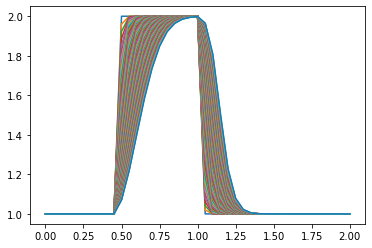

Text(0.5, 1.0, '1D Linear Convection')

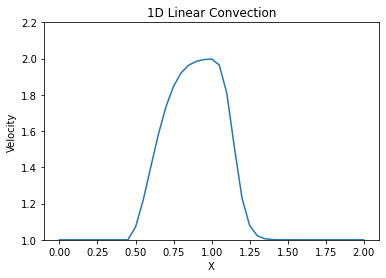

In [8]:
nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 100  #nt is the number of timesteps we want to calculate
dt = 0.001
grid = np.linspace(0,2,nx) # creating the space grid    

u0 = np.ones(nx)      #numpy function ones()
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0)
u = u0.copy()
un = np.ones(nx)

solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)
#Plotting data
plt.plot(grid,u);
plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Linear Convection')

## Call Funtions

### Pure function

In [13]:
%timeit solve_1d_nonlinearconv_pure(u, un, nt, nx, dt, dx)

3.33 ms ± 86.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Function with numba accelerator

In [13]:
%timeit solve_1d_nonlinearconv_numba(u, un, nt, nx, dt, dx)

The slowest run took 5.48 times longer than the fastest. This could mean that an intermediate result is being cached.
5.48 µs ± 4.91 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with pyccel accelerator

In [28]:
solve_1d_nonlinearconv_f90 = epyccel(solve_1d_nonlinearconv_pyccel)

In [29]:
%timeit solve_1d_nonlinearconv_f90(u, un, nt, nx, dt, dx)

3.31 µs ± 5.59 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
